In [1]:
# 주피터 노트북 환경설정
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

from IPython.display import Image

from IPython.core.display import display, HTML
# display(HTML("<style>.container { font-weight: bold !important; font-family:'Malgun Gothic' !important;}</style>"))
# display(HTML("<style>.container { font-weight: bold !important;}</style>"))
# display(HTML("<style>.container { width: 98% !important; }</style>"))

In [2]:
import numpy as np
import pandas as pd
import os

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")
%matplotlib inline

# 관련 라이브러리 임포트 
import matplotlib.font_manager as fm

#  한글글꼴로 변경
# plt.rcParams['font.family'] = '한글글꼴명'
plt.rcParams['font.size'] = 11.0
# plt.rcParams['font.family'] = 'batang'
plt.rcParams['font.family'] = 'Malgun Gothic'

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
matplotlib.rcParams['axes.unicode_minus'] = False

# 그래프 기본 크기 설정 
plt.rcParams['figure.figsize'] = [10, 6]

# 회귀 트리 

- 결정 트리 기반의 DecisionTreeRegressor, 앙상블 기반의 GMM Regressor, Light GBM Regressor 등 
- 회귀를 위한 트리를 생성하고 이를 기반으로 회귀 예측. 

### 회귀 Estimator 클래스	
Decision Tree Regressor	 <br>
Gradient Boosting Regressor <br>
XGBRegressor <br>
LGBMRegressor <br>


<img src='https://lucy-the-marketer.kr/wp-content/uploads/2021/03/Regression-tree-and-model-tree-example.png'>



<img src='https://t1.daumcdn.net/cfile/tistory/99D8E1385F3FC38109'>

In [3]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor

from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.ensemble import VotingRegressor

from sklearn.metrics import accuracy_score, mean_absolute_error, r2_score, mean_squared_error
from sklearn.metrics import f1_score, recall_score, precision_score, classification_report, r2_score, confusion_matrix

from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from sklearn.pipeline import Pipeline

## 보스턴 데이타셋 준비

```
CRIM: 지역별 범죄 발생률
ZN: 25,000평방피트를 초과하는 거주 지역의 비율
NDUS: 비상업 지역 넓이 비율
CHAS: 찰스강에 대한 더미 변수(강의 경계에 위치한 경우는 1, 아니면 0)
NOX: 일산화질소 농도
RM: 거주할 수 있는 방 개수
AGE: 1940년 이전에 건축된 소유 주택의 비율
DIS: 5개 주요 고용센터까지의 가중 거리
RAD: 고속도로 접근 용이도
TAX: 10,000달러당 재산세율
PTRATIO: 지역의 교사와 학생 수 비율
B: 지역의 흑인 거주 비율
LSTAT: 하위 계층의 비율
MEDV: 본인 소유의 주택 가격(중앙값)
```

In [4]:
from sklearn.datasets import load_boston

boston = load_boston()
boston_df = pd.DataFrame(boston.data, columns = boston.feature_names)

boston_df['PRICE'] = boston.target
y_target = boston_df['PRICE']
X_data = boston_df.drop(['PRICE'], axis=1,inplace=False)

In [5]:
boston_df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

In [6]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
boston_df.sample(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
171,2.31390,0.0,19.58,0.0,0.605,5.880,97.3,2.3887,5.0,403.0,14.7,348.13,12.03,19.1
488,0.15086,0.0,27.74,0.0,0.609,5.454,92.7,1.8209,4.0,711.0,20.1,395.09,18.06,15.2
46,0.18836,0.0,6.91,0.0,0.448,5.786,33.3,5.1004,3.0,233.0,17.9,396.90,14.15,20.0


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, 
                                                    test_size=0.2, random_state=11)

In [9]:
#선형회귀
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)
model_linear.score(X_test, y_test), r2_score(y_test, model_linear.predict(X_test))

(0.6859495577055552, 0.6859495577055552)

In [10]:
#회귀 결정 트리
model_dtr = DecisionTreeRegressor(random_state=0)
model_dtr.fit(X_train, y_train)
model_dtr.score(X_test, y_test), r2_score(y_test, model_dtr.predict(X_test))

(0.6428055406780178, 0.6428055406780178)

In [11]:
#랜덤 포레스트 회귀
model_rfr = RandomForestRegressor(random_state=0, n_estimators=1000)
model_rfr.fit(X_train, y_train)
model_rfr.score(X_test, y_test), r2_score(y_test, model_rfr.predict(X_test))

(0.7843525680450454, 0.7843525680450454)

In [12]:
#GBM 회귀
model_gbr = GradientBoostingRegressor(random_state=0, n_estimators=1000)
model_gbr.fit(X_train, y_train)
model_gbr.score(X_test, y_test), r2_score(y_test, model_gbr.predict(X_test))

(0.8136909369605254, 0.8136909369605254)

In [13]:
#XGB 회귀
model_xgbr = XGBRegressor(random_state=0, n_estimators=1000)
model_xgbr.fit(X_train, y_train)
model_xgbr.score(X_test, y_test), r2_score(y_test, model_xgbr.predict(X_test))

(0.7677992543954298, 0.7677992543954298)

In [15]:
feature_series.sort_values(ascending=False)

RM         0.458074
LSTAT      0.370871
DIS        0.048905
CRIM       0.035924
NOX        0.026189
AGE        0.013223
TAX        0.012920
B          0.011217
PTRATIO    0.011036
INDUS      0.005862
RAD        0.003157
CHAS       0.001616
ZN         0.001005
dtype: float64

<AxesSubplot:>

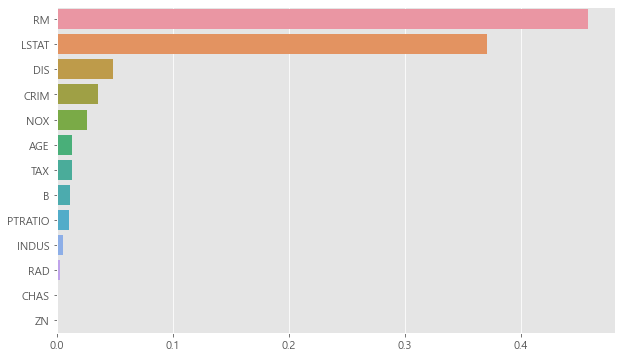

In [14]:
# 랜덤포레스트 중요 피처 속성 
feature_series = pd.Series(data=model_rfr.feature_importances_, index=X_data.columns )
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x= feature_series, y=feature_series.index)

<AxesSubplot:>

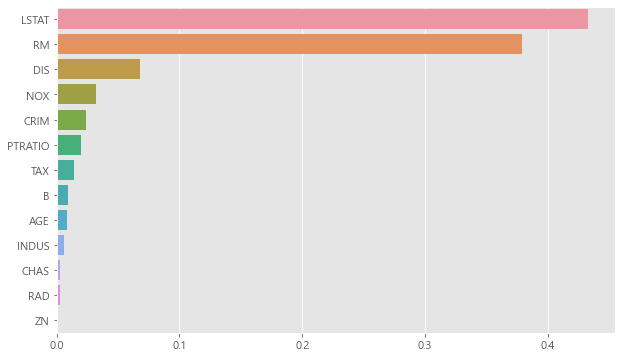

In [16]:
# GBM 중요 피처 속성 
feature_series = pd.Series(data=model_gbr.feature_importances_, index=X_data.columns )
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x= feature_series, y=feature_series.index)

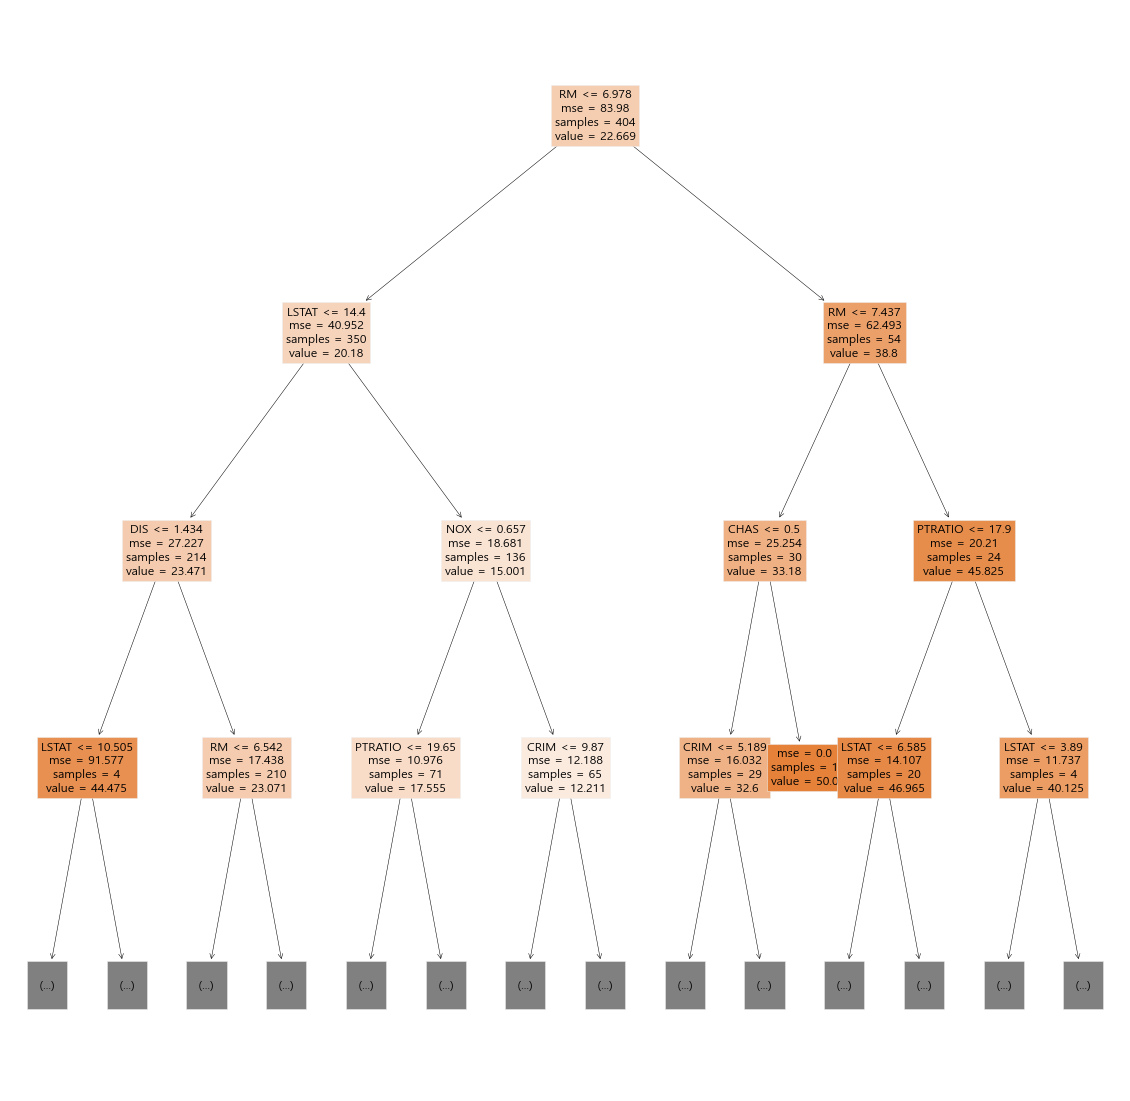

In [17]:
#회귀트리 시각화
from sklearn.tree import plot_tree

plt.figure(figsize=(20,20))
plot_tree(model_dtr, max_depth=3, filled=True, feature_names=X_data.columns, fontsize=12)
plt.show()

In [18]:
model_rfr.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1000,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

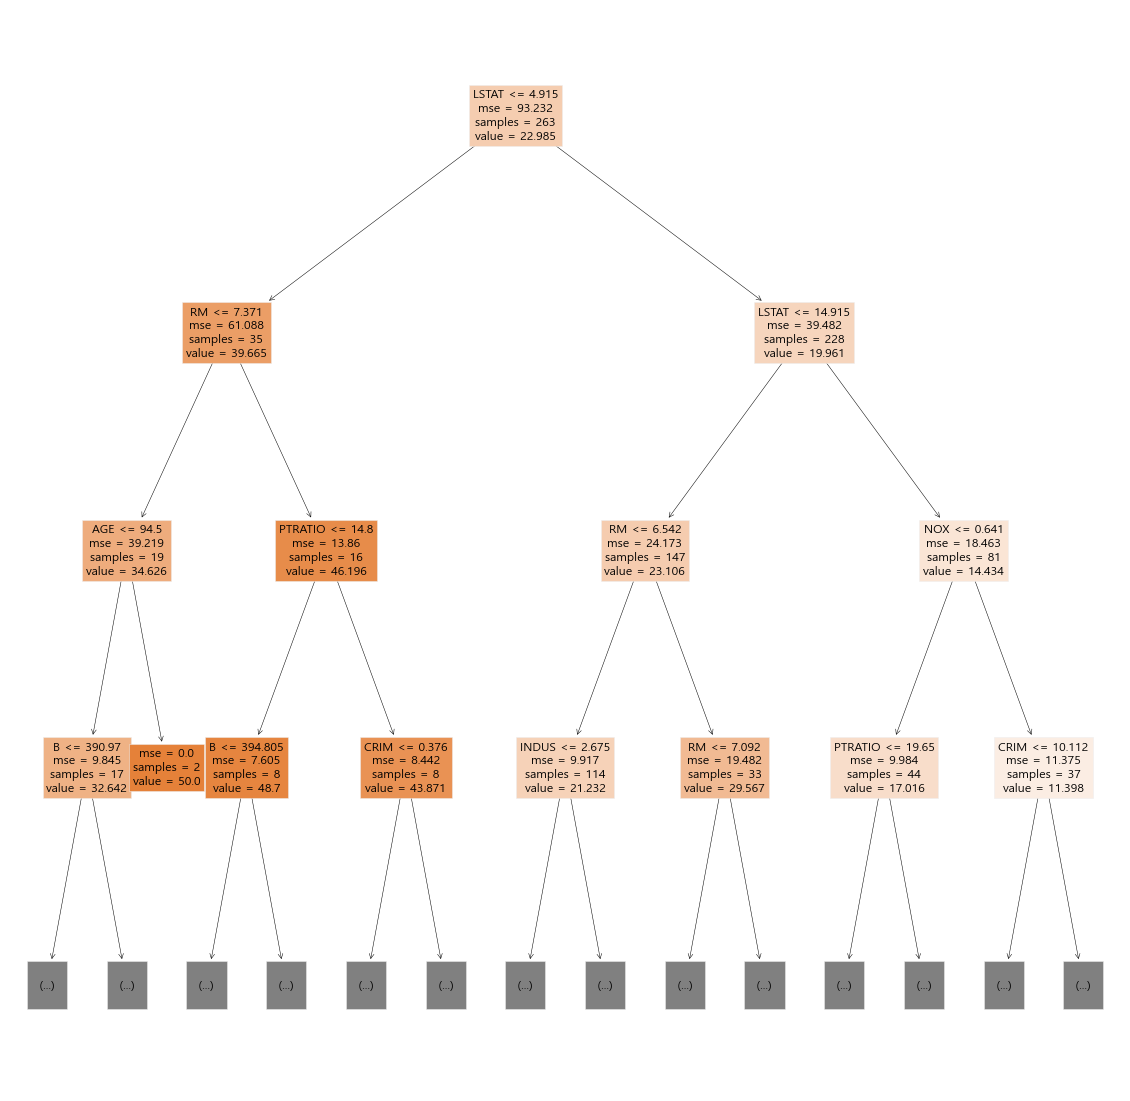

In [19]:
plt.figure(figsize=(20,20))
plot_tree(model_rfr[999], max_depth=3, filled=True, feature_names=X_data.columns, fontsize=12)
plt.show()

### 퀴즈 : 회귀문제 
- 자전거 대여 수요 예측 
- Linear Regressor, Lasso Regressor, Ridge , DecisionTree Regressor, RandomForestRegressor, 
GradientBoosting Regressor, XGB Regressor 다양한 모델을 구축하고 테스트하여라. 
- 각각의 평가지표 점수를 barplot으로 시각화

In [20]:
bike_df = pd.read_csv('bike_train.csv')
bike_df['datetime'] = bike_df.datetime.apply(pd.to_datetime)
bike_df['year'] = bike_df.datetime.apply(lambda x : x.year)
bike_df['month'] = bike_df.datetime.apply(lambda x : x.month)
bike_df['day'] = bike_df.datetime.apply(lambda x : x.day)
bike_df['hour'] = bike_df.datetime.apply(lambda x: x.hour)

# 회원, 비회원 대여량은 삭제 
drop_columns = ['datetime','casual','registered']
bike_df.drop(drop_columns, axis=1,inplace=True)


y_target = bike_df['count']
X_features = bike_df.drop(['count'],axis=1,inplace=False)

X_features = pd.get_dummies(X_features, columns=['year','month','hour', 'holiday',
                                              'workingday','season','weather'])
X_features.head()

,temp,atemp,humidity,windspeed,day,year_2011,year_2012,month_1,month_2,month_3,...,workingday_0,workingday_1,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,9.84,14.395,81,0.0,1,1,0,1,0,0,...,1,0,1,0,0,0,1,0,0,0
1,9.02,13.635,80,0.0,1,1,0,1,0,0,...,1,0,1,0,0,0,1,0,0,0
2,9.02,13.635,80,0.0,1,1,0,1,0,0,...,1,0,1,0,0,0,1,0,0,0
3,9.84,14.395,75,0.0,1,1,0,1,0,0,...,1,0,1,0,0,0,1,0,0,0
4,9.84,14.395,75,0.0,1,1,0,1,0,0,...,1,0,1,0,0,0,1,0,0,0


In [22]:
X_features.shape

(10886, 55)

In [23]:
X_features.columns

Index(['temp', 'atemp', 'humidity', 'windspeed', 'day', 'year_2011',
       'year_2012', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5',
       'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11',
       'month_12', 'hour_0', 'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5',
       'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12',
       'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18',
       'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23', 'holiday_0',
       'holiday_1', 'workingday_0', 'workingday_1', 'season_1', 'season_2',
       'season_3', 'season_4', 'weather_1', 'weather_2', 'weather_3',
       'weather_4'],
      dtype='object')

In [42]:
#학습, 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.3, random_state=0)

In [44]:
#릿지
from sklearn.linear_model import Ridge

model_ridge = Ridge()
model_ridge.fit(X_train, y_train)
model_ridge.score(X_test, y_test)

0.68253908818354

In [45]:
#라쏘
from sklearn.linear_model import Lasso

model_lasso = Lasso()
model_lasso.fit(X_train, y_train)
model_lasso.score(X_test, y_test)

0.6628167052449485

In [25]:
#선형회귀
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)
model_linear.score(X_test, y_test), r2_score(y_test, model_linear.predict(X_test))

(0.6824850960662128, 0.6824850960662128)

In [26]:
#회귀 결정 트리
model_dtr = DecisionTreeRegressor(random_state=0)
model_dtr.fit(X_train, y_train)
model_dtr.score(X_test, y_test), r2_score(y_test, model_dtr.predict(X_test))

(0.8179952655235326, 0.8179952655235326)

In [27]:
#랜덤 포레스트 회귀
model_rfr = RandomForestRegressor(random_state=0, n_estimators=1000)
model_rfr.fit(X_train, y_train)
model_rfr.score(X_test, y_test), r2_score(y_test, model_rfr.predict(X_test))

(0.903981732003619, 0.903981732003619)

In [28]:
#GBM 회귀
model_gbr = GradientBoostingRegressor(random_state=0, n_estimators=1000)
model_gbr.fit(X_train, y_train)
model_gbr.score(X_test, y_test), r2_score(y_test, model_gbr.predict(X_test))

(0.9182328855089145, 0.9182328855089145)

In [29]:
#XGB 회귀
model_xgbr = XGBRegressor(random_state=0, n_estimators=1000)
model_xgbr.fit(X_train, y_train)
model_xgbr.score(X_test, y_test), r2_score(y_test, model_xgbr.predict(X_test))

(0.9214794074427378, 0.9214794074427378)

In [46]:
y = ['model_ridge', 'model_lasso', 'model_linear', 'model_dtr', 'model_rfr', 'model_gbr', 'model_xgbr']
x = [0.68253908818354, 0.6628167052449485, 0.6824850960662128, 0.8179952655235326, 
     .903981732003619, 0.9182328855089145, 0.9214794074427378]

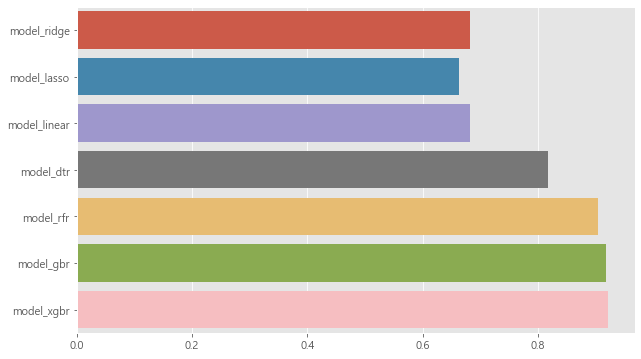

In [47]:
sns.barplot(x, y);